In [38]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import umap.umap_ as umap
import umap.plot

In [65]:
single_910_raw =pd.read_csv('./GSE910_scGPT_output.csv', index_col=0)
single_910_raw

,N_13,N_74,R_100,R_93,N_17,R_102,R_10,R_106,R_75,R_18,...,N_53,N_46,N_56,R_104,N_3,N_82,N_5,R_55,N_79,N_24
12_SCORE: MTATP6P1,0.794223,0.657451,0.742797,0.613641,0.725778,0.698747,0.776080,0.831021,0.759570,0.738387,...,0.707617,0.605011,0.638546,0.630796,0.496346,0.717172,0.845413,0.860417,0.670038,0.853110
13_SCORE: MIR3609,0.477020,0.494368,0.503214,0.512833,0.627050,0.527848,0.513209,0.469250,0.464223,0.474135,...,0.470372,0.318537,0.513024,0.478721,0.435384,0.477556,0.437533,0.477181,0.476469,0.469126
14_SCORE: S100A9,0.286622,0.379552,0.283640,0.313037,0.289727,0.069759,0.438414,0.296308,0.282724,0.467891,...,0.312530,0.432626,0.320818,0.462495,0.229814,0.354881,0.483027,0.443137,0.284448,0.431883
"2_SCORE: PMEL, TYRP1, DCT",0.002986,0.002641,0.001576,0.018391,0.002331,0.007079,0.074431,0.004588,0.177176,0.002186,...,0.236050,0.001847,0.021165,0.001003,0.002342,0.003540,0.108409,0.003462,0.057380,0.046294
15_SCORE: ORM1,0.432878,0.440942,0.428430,0.432797,0.428034,0.427567,0.443885,0.456132,0.470427,0.426941,...,0.436409,0.970335,0.415414,0.459015,0.423914,0.425176,0.398739,0.427081,0.426029,0.444351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80_SCORE: APOH,0.548429,0.540810,0.542254,0.548081,0.534986,0.547090,0.548073,0.556915,0.487779,0.535237,...,0.556600,1.000000,0.548073,0.544390,0.547327,0.548073,0.548073,0.548073,0.548073,0.540620
81_SCORE: RNU4-2,0.272707,0.134982,0.245186,0.061367,0.689739,0.264765,0.331592,0.152449,0.195611,0.246300,...,0.278282,0.181028,0.344385,0.069483,0.240334,0.233338,0.283703,0.300090,0.206462,0.271807
82_SCORE: MT-TC,0.629447,0.349336,0.555851,0.393945,0.517238,0.623794,0.562543,0.642188,0.434193,0.572799,...,0.417744,0.403668,0.361430,0.554962,0.274141,0.502579,0.654696,0.604054,0.541397,1.000000
83_SCORE: MT-TP,0.749497,0.762860,0.651150,0.623634,0.607033,0.612159,0.686592,0.798426,0.515150,0.647733,...,1.000000,0.547958,0.548924,0.613129,0.256344,0.657020,0.550262,0.826981,0.724996,0.742690


In [91]:
labels = []
for i, col_name in enumerate(single_910_raw.columns):
    if 'N' in col_name:
        labels.append("N")

    else: 
        labels.append("R")
Response= pd.DataFrame(labels, columns=['Response'])
single_910_T = single_910_raw.T
single_910_T.reset_index(drop=True, inplace=True)
single_910 =single_910_T.apply(pd.to_numeric, errors = 'coerce')
print(single_910.head())

   12_SCORE: MTATP6P1  13_SCORE: MIR3609  14_SCORE: S100A9  \
0            0.794223           0.477020          0.286622   
1            0.657451           0.494368          0.379552   
2            0.742797           0.503214          0.283640   
3            0.613641           0.512833          0.313037   
4            0.725778           0.627050          0.289727   

   2_SCORE: PMEL, TYRP1, DCT  15_SCORE: ORM1  16_SCORE: PGC  17_SCORE: SPP1  \
0                   0.002986        0.432878       0.416637        0.497002   
1                   0.002641        0.440942       0.583493        0.388668   
2                   0.001576        0.428430       0.404802        0.611948   
3                   0.018391        0.432797       0.420803        0.429856   
4                   0.002331        0.428034       0.402557        0.557221   

   18_SCORE: MT-ND2  19_SCORE: MT-CO1  20_SCORE: MT-ATP6  ...  76_SCORE: TFF1  \
0          0.943506          0.999629           0.233680  ...        0.

In [68]:
# Train a logistic regression model using the top PCs before optimizing hyperparameters
X_train, X_test, y_train, y_test = train_test_split(single_910, Response['Response'], test_size = 0.3, random_state=1210)
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print("Training accuracy before hyperparameter optimization:", training_accuracy)
print("Test set accuracy before hyperparameter optimization:", test_accuracy)

Training accuracy before hyperparameter optimization: 0.8765432098765432
Test set accuracy before hyperparameter optimization: 0.8571428571428571


In [42]:
# cv of PCA (number of PCs) and L1 logistic regression

pipeline = Pipeline(
    [('clf', LogisticRegression(penalty = 'l1'))])

hyperparameters = {

    'clf__C': [0.1, 1, 10, 100, 1000],
    'clf__solver': ['liblinear', 'saga'],
    'clf__max_iter': [10000]
}

grid_search = GridSearchCV(pipeline, hyperparameters,  cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'clf__C': 1000, 'clf__max_iter': 10000, 'clf__solver': 'liblinear'}


In [43]:
# Train a logistic regression model using the top PCs after optimizing hyperparameters
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training accuracy after hyperparameter optimization:", training_accuracy)
print("Test set accuracy after hyperparameter optimization:", test_accuracy)

Training accuracy after hyperparameter optimization: 1.0
Test set accuracy after hyperparameter optimization: 0.7714285714285715


In [69]:
coefficients = logreg.coef_[0]

# Mapping coefficients to feature names
feature_names = X_train.columns

# Creating a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting coefficients by absolute value to find the most important ones
top_coef = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Printing the top features
print("Top important features:")
print(top_coef.head())

Top important features:
                             Feature  Coefficient
41                   45_SCORE: RPS12     1.043893
26  1_SCORE: HLA-DRB1, HLA-DRA, CD74     0.966863
58                  61_SCORE: MT-ND4    -0.911150
47                   50_SCORE: MT-TN     0.900976
79                   79_SCORE: IGHA1    -0.891200


In [45]:
clusters_scgpt = pd.concat([pd.DataFrame(y_pred, columns = ['y_pred']), pd.DataFrame(y_test.to_list(), columns = ['y_test'])], axis = 1)
clusters_scgpt

,y_pred,y_test
0,R,R
1,R,N
2,R,N
3,N,N
4,R,R
5,R,R
6,R,R
7,R,R
8,R,N
9,N,N


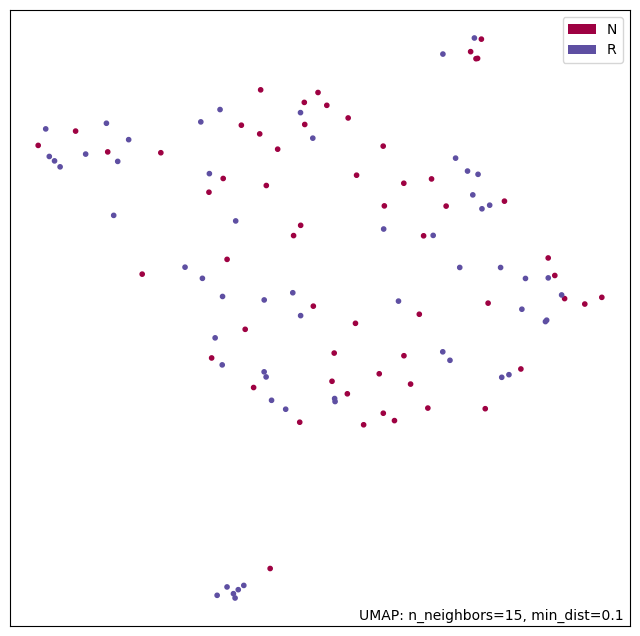

In [46]:
UMAP= umap.UMAP()
umap_red= UMAP.fit_transform(single_910)

labels = Response['Response'].values


umap.plot.points(UMAP, labels = labels)
umap.plot.plt.show()

In [47]:
clusters_scgpt.to_csv('../data/clusters_scgpt.csv')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
print(single_910.shape)
single_910_response = pd.concat([single_910, Response],axis = 1)
single_910_response.shape

(116, 85)


(116, 86)

In [92]:
single_910_sorted = single_910_response.sort_values(by='Response', ascending=False)
print(single_910_sorted)

     12_SCORE: MTATP6P1  13_SCORE: MIR3609  14_SCORE: S100A9  \
58             0.654283           0.476472          0.398202   
32             0.611509           0.484248          0.457396   
36             0.717898           0.525865          0.120918   
104            0.667256           0.509782          0.203694   
38             0.728393           0.541535          0.369665   
..                  ...                ...               ...   
70             0.801736           0.428957          0.174845   
72             0.634721           0.474914          0.313986   
76             0.892945           0.548563          0.157247   
77             0.855446           0.336312          0.356530   
115            0.853110           0.469126          0.431883   

     2_SCORE: PMEL, TYRP1, DCT  15_SCORE: ORM1  16_SCORE: PGC  17_SCORE: SPP1  \
58                    0.005328        0.426439       0.418056        0.572942   
32                    0.000812        0.457803       0.419966        

In [93]:
for i, index in enumerate(single_910_sorted.index):
    responses = single_910_sorted.at[index, 'Response']
    new_index = f'{responses}_{index}'
    single_910_sorted = single_910_sorted.rename(index={index: new_index})

single_910_sorted = single_910_sorted.drop(columns = ['Response'])

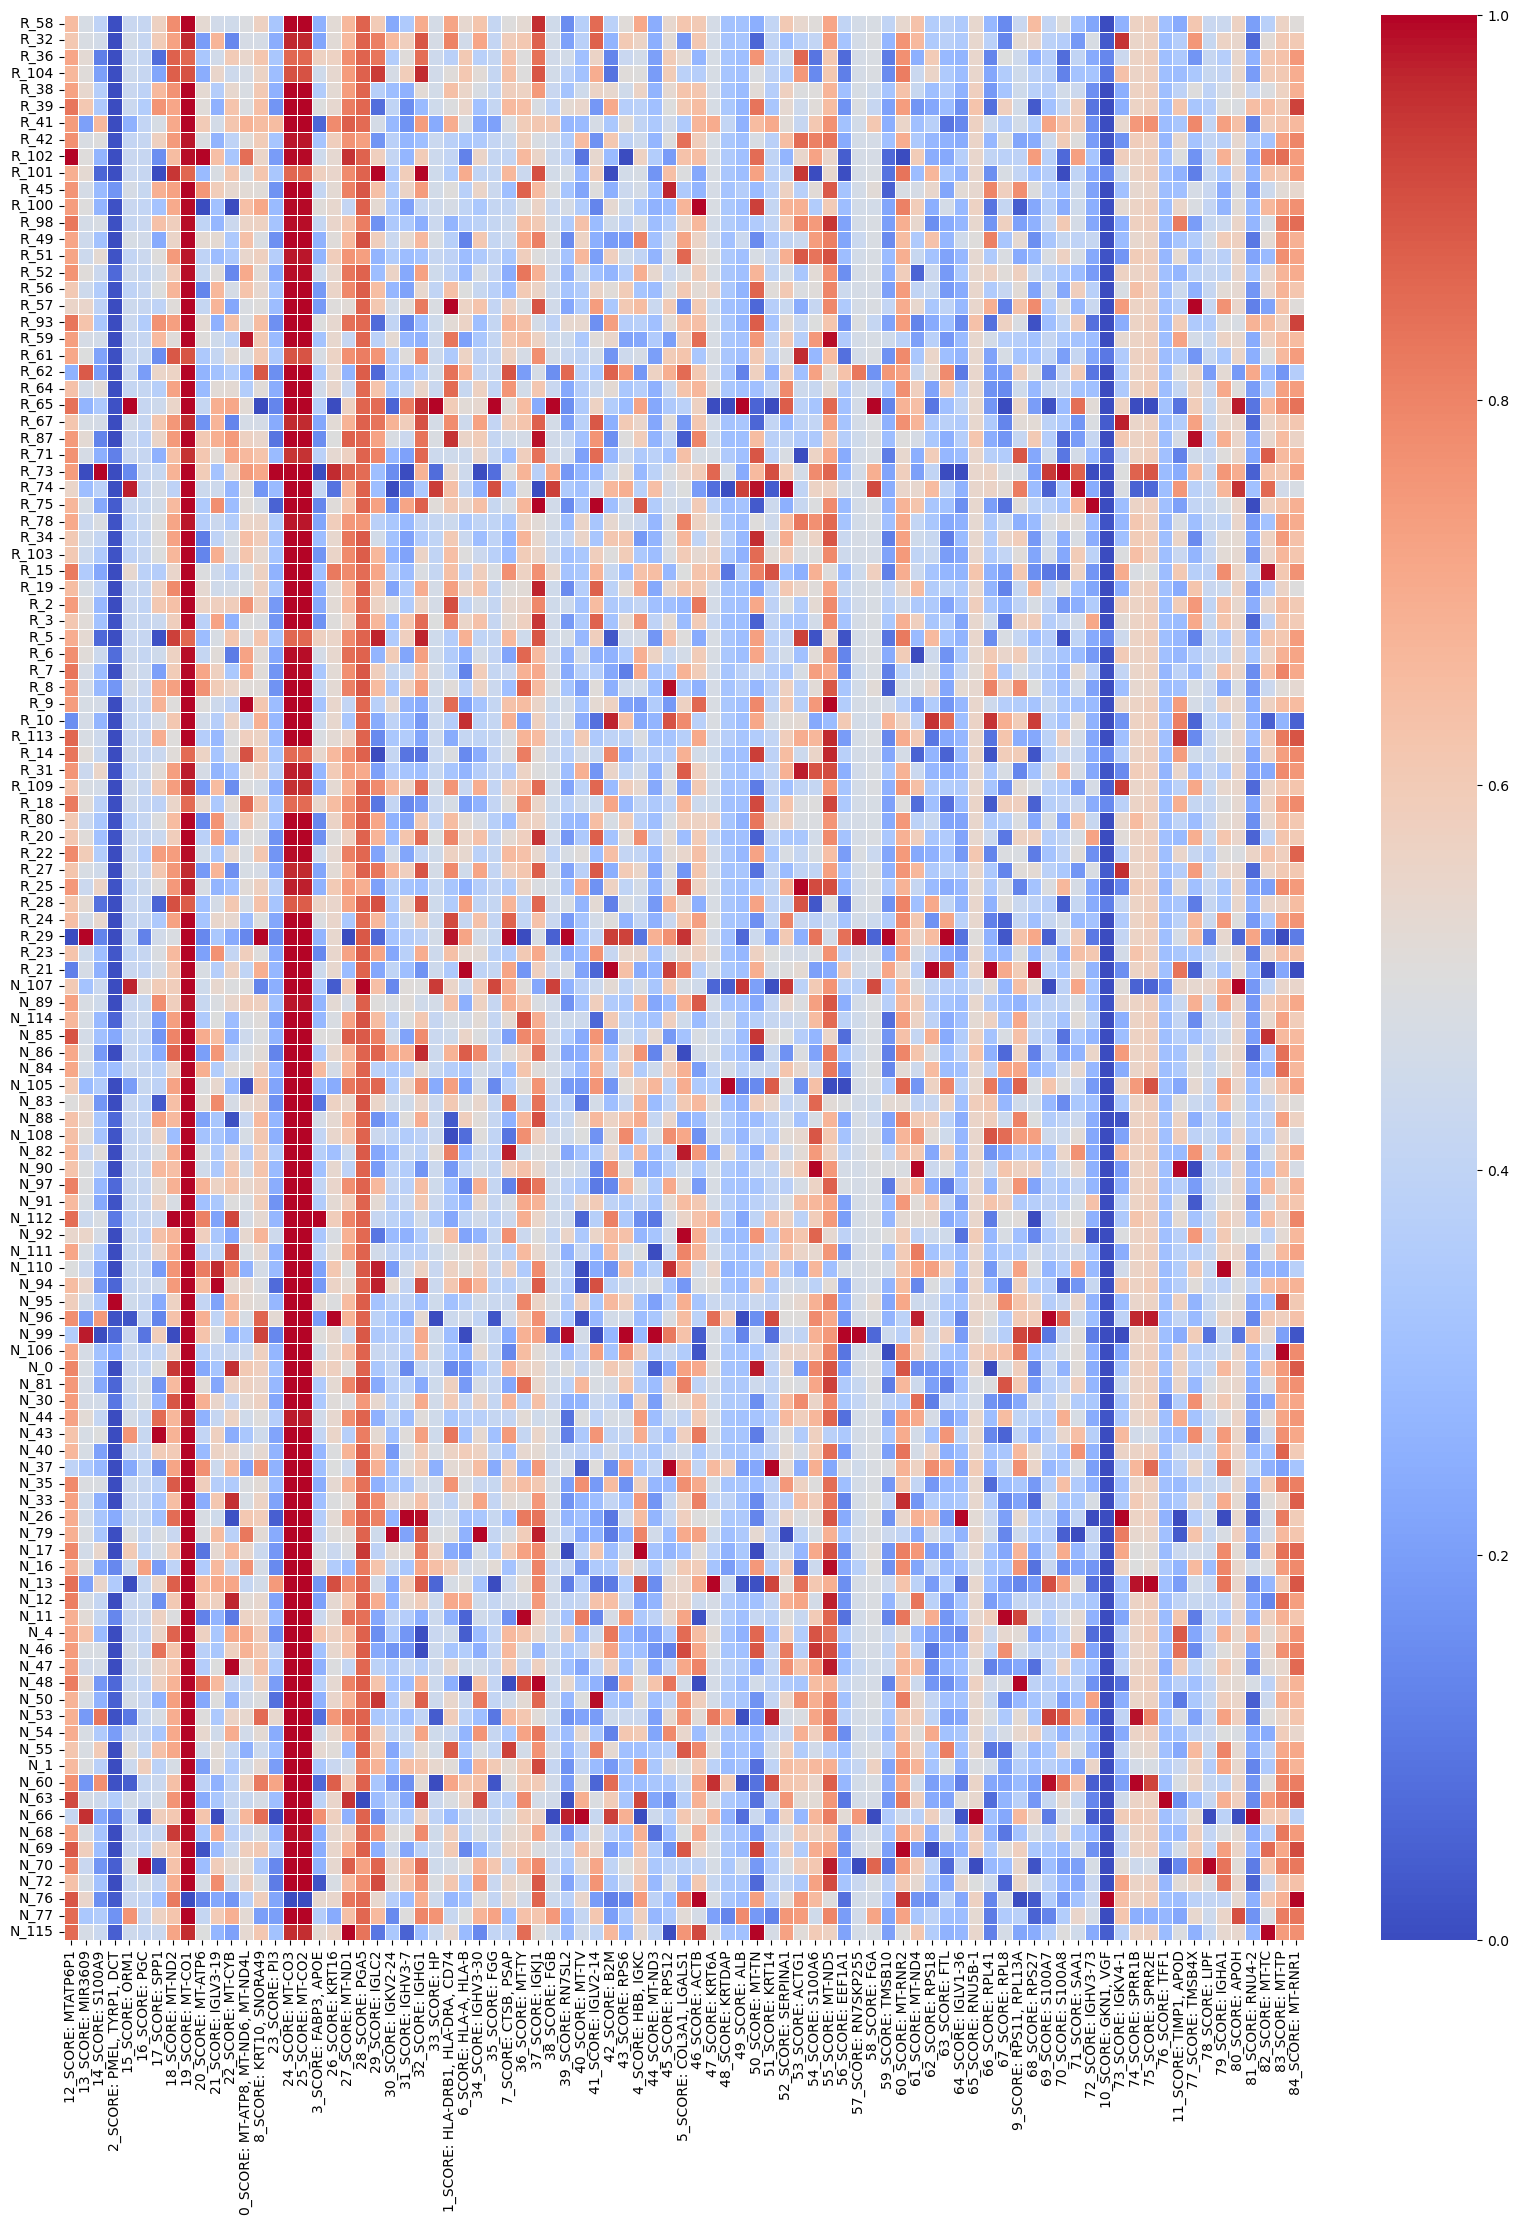

In [103]:
plt.figure(figsize=(20, 25))
sns.heatmap(single_910_sorted,cmap='coolwarm',  linewidths=0.5 )
plt.show()